# **Inicio del AB FINAL**

## **Preparacion de los datos**

En este caso, se ha decidido crear este dataframe unificando todos los CSV en un único DataFrame y añadir una columna que identifique el origen (por ejemplo, source_id). Ya que la otra es crear un diccionario con cada csv separado, pero la custion es que las estructuras de columnas son muy parecidas y no paraece que se vaya a necesitar tratamientos específicos por fichero, si no mas bien en conjunto.

Por ello, se considera que es mas optima esta opción de unificar todos los datos en el mismo Dataframe

### Ruta de los *csv*

In [ ]:
# Instalar dependencias necesarias
import subprocess
import sys

packages = [
    "pandas",
    "numpy", 
    "openpyxl",
    "matplotlib",
    "seaborn",
    "scikit-learn",
    "scipy",
    "cmdstanpy",
    "pystan",
    "prophet"
]

for package in packages:
    try:
        __import__(package.replace("-", "_"))
        print(f"✓ {package} ya está instalado")
    except ImportError:
        print(f"Instalando {package}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])
            print(f"✓ {package} instalado correctamente")
        except subprocess.CalledProcessError:
            print(f"⚠️ Error instalando {package}, continuando...")

In [ ]:
import pandas as pd
from pathlib import Path
import re

### **Función de ingerta de datos**

En este caso, tras invesigar, encontre la funcion ***glob***, la cual busca un patron en comun al cual comparar en una ruta especificada y a partir de ahi, extrae todas las rutas cojn dicho patron. Por ello, para insertar todos los csv, hare una función que busque archivos acabados en "*.csv*".

Además, haré un bucle con un for para recorrer y comprobar que se hayan descargado y leido los datos correctamente.

#### ***Merge de los csv***

Una vez ya nos hemos asegurado de que todos los csv estan preparados para juntarlos en el mismo Dataframe, toca juntarlos propiamente en el mismo Dataframe para trabajar a posteriori con ellos.

Además, como vimos en el resultado de la celda anterior, hay muchas columnas llamadas Unnamed, las cuales no tienen nada de información dentro, por lo que a la hora de crear el Dataframe, lo solucionare eliminando todas estas columnas que no necesitamos y solo ensucian el Dataframe.



>  # Resultados de la celda anterior
    AguaEmbalsada_RioCofio_LaAcena.csv
    Columnas:['anio', 'mes', 'hec_cub', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']
    ---------------------------------------------------------------
    Archivo: AguaEmbalsada_RioGuadalix_Pedrezuela.csv
    Columnas: ['anio', 'mes', 'hec_cub', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']quote



Además, para la nueva columna para el Dataframe, he decidido que el contenido de dicha columna, en vez de ser la ruta de donde se han importados los datos, sea mejor directamente el nombre del embalse de donde se han sacado los datos. Esto, lo he hecho mediante la siguiente forma:



>   # Añadir columna con el nombre del archivo:
    nombre = Path(archivo).stem
    embalse = nombre.split("_")[-1]          
    df["embalse"] = embalse









#### **Comparacion de los csv**

Una vez que ya se que se han leido todos los csv correctamente, quiero comparar las columnas de los distintos *csv*, ya que para poder fusionar en un mismo Dataframe todos los datos, necesitamos asegurarnos de que se van a apilar correectamente y no se van a generear columnbas indeseadas por que ciertas columnas se llamen de forma distinta, como por ejemplo:  

*   La columna se llama ***Año***
*   La columna se llama ***Fecha***

Además, he estado teniendo un mismo error a la hora de leer los datos, ya que me salia que:


    UnicodeDecodeError                        Traceback (most recent call last)
    /tmp/ipython-input-2309794888.py in <cell line: 0>()
          5
          6 for archivo in CSVs:
    ----> 7   df_temp = pd.read_csv(archivo, nrows=0, sep=";")
          8   columnas_por_archivo[archivo.split("/")[-1]] = list(df_temp.columns)
          9

    5 frames
    parsers.pyx in pandas._libs.parsers.TextReader.__cinit__()

    parsers.pyx in pandas._libs.parsers.TextReader._get_header()

    parsers.pyx in pandas._libs.parsers.TextReader._tokenize_rows()

    parsers.pyx in pandas._libs.parsers.TextReader._check_tokenize_status()

    parsers.pyx in pandas._libs.parsers.raise_parser_error()

    /usr/lib/python3.12/codecs.py in decode(self, input, final)

    UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 8059: invalid continuation byte *texto en cursiva*




Esto indica que alguno de los CSV no está en *UTF-8*, sino probablemente en *Latin-1 (ISO-8859-1)*, cosa que al parecer es muy comun en ficheros Españoles, por lo que he metido un segundo intento de lectura con ***encoding="latin-1"*** si falla con ***UTF-8.***


#### **Función de Ingesta**

In [ ]:
ruta = "data/"
archivos = sorted(glob.glob(ruta + "*.csv"))
print(f"Archivos encontrados: {len(archivos)}")
for archivo in archivos:
    print(f"  - {Path(archivo).name}")

In [ ]:
def cargar_df_embalses(archivos):
    """
    Lee archivos csv desde la carpeta 'data/', los limpia y los merge en un único DataFrame.
    
    Pasos:
    1) Inspecciona y compara columnas
    2) Lee, limpia y mergea en df_embalses
    
    Devuelve df_embalses.
    """

    # -------- Inspeccionar columnas --------
    columnas_por_archivo = {}

    for archivo in archivos:
        try:
            df_temp = pd.read_csv(archivo, nrows=0, sep=";", encoding="utf-8")
        except UnicodeDecodeError:
            df_temp = pd.read_csv(archivo, nrows=0, sep=";", encoding="latin-1")
        
        columnas_por_archivo[Path(archivo).name] = list(df_temp.columns)

    # Mostrar columnas de cada archivo
    for nombre, columnas in columnas_por_archivo.items():
        print("\nArchivo:", nombre)
        print("Columnas:", columnas)

    # Comparar todas las columnas con las del primer archivo
    referencia = list(columnas_por_archivo.values())[0]

    print("\n" + "="*50)
    print("Comparación con la referencia:")
    print("Archivo de referencia:", list(columnas_por_archivo.keys())[0])
    print("="*50)

    for nombre, columnas in columnas_por_archivo.items():
        if columnas == referencia:
            print("✅", nombre, "tiene las mismas columnas")
        else:
            print("⚠️", nombre, "tiene columnas diferentes")
            print("   Columnas diferentes:", set(columnas).symmetric_difference(set(referencia)))

    # -------- Leer, limpiar y mergear --------
    lista_df = []
    columnas_referencia = None

    print("\n" + "="*50)
    print(f"Iniciando merge de {len(archivos)} archivos...")
    print("="*50)

    for archivo in archivos:
        try:
            df = pd.read_csv(archivo, sep=";", encoding="utf-8")
        except UnicodeDecodeError:
            df = pd.read_csv(archivo, sep=";", encoding="latin-1")

        # Eliminar columnas basura tipo "Unnamed: X"
        df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])

        # Añadir columna con el nombre del embalse
        nombre = Path(archivo).stem
        embalse = nombre.split("_")[-1]
        df["embalse"] = embalse

        # Registrar columnas de referencia del primer archivo
        if columnas_referencia is None:
            columnas_referencia = list(df.columns)
            print("Columnas de referencia:", columnas_referencia)

        lista_df.append(df)
        print(f"✓ Leído: {Path(archivo).name}")

    # Concatenar todo
    df_embalses = pd.concat(lista_df, ignore_index=True, sort=False)

    print("\n" + "="*50)
    print("Merge completado.")
    print(f"Filas totales: {len(df_embalses)}")
    print(f"Columnas totales: {len(df_embalses.columns)}")
    print(f"Columnas finales: {list(df_embalses.columns)}")
    print("="*50)

    return df_embalses

In [ ]:
if len(archivos) == 0:
    print("⚠️ No hay archivos .xlsx en la carpeta 'data/'")
    print("Por favor, coloca tus archivos Excel en: data/")
    df_embalses = None
else:
    df_embalses = cargar_df_embalses(archivos)

In [ ]:
if df_embalses is not None:
    df_embalses
else:
    print("Esperando a que carguen los datos...")

In [ ]:
if df_embalses is not None:
    # De esta forma, usando el iloc, podemos ver si realmente estan mezclados bien los datos
    print(df_embalses.iloc[1500:2003] if len(df_embalses) > 2003 else df_embalses.head())

In [ ]:
df_embalses.dtypes

## **Limpieza de la base de datos**

### Contexto

Una cosa a tener en cuenta, es que para este trabajo, hemos pensado usar el algoritmo de prediccion de serie temporales Prophet, por lo cual la base de datos deberá estar preferentemente para la facilidad del entrenamiento del algortimo en un estilo, en el que los embalses sea las columnas y sus datos se rellenen con las cantidades de agua medidas en cada mes y año.

### Limpieza técnica

#### Normalización de los meses con diccionario

Ahora, ya que debe estar en formato numerico, ya lo quiera pasar mas adelante a un tipo de dato Datetype, o no, el modelo lee solamente numeros, por lo cual, debo pasarlo de los meses ***"enero", "febrero", etc...*** a los nombres de los meses a formato numérico ***"01", "02"***...

In [ ]:
# Diccionario de meses → número con padding de dos dígitos
mes_map = {
    "enero": "01",
    "febrero": "02",
    "marzo": "03",
    "abril": "04",
    "mayo": "05",
    "junio": "06",
    "julio": "07",
    "agosto": "08",
    "septiembre": "09",
    "setiembre": "09",   # por seguridad
    "octubre": "10",
    "noviembre": "11",
    "diciembre": "12"
}

# Normalizamos y reemplazamos directamente la columna 'mes'
df_embalses["mes"] = (
    df_embalses["mes"]
    .astype(str)
    .str.strip()
    .str.lower()
    .map(mes_map)
)

# Comprobación rápida
df_embalses["mes"].head(15)


#### Limpieza de columnas inecesarias

Una vez tengo la base de datos en este estado, he decidido extraer el actual estado de la base de datos ya que se pueden ver claramente ciertos aspectos raros n la base de datos como datos nulos, y aprovechando que trabajamos con una base de datos pequeña, importare la propia base de datos actual a un csv para poder visualizar de forma mas clara para ver si hay algún dato raro.

Añun asi, esto solo se puede hacer ya que es una base de datos relativamente pequeña. Por ello, también mostrare el como poder visualizar si hay ruido en el csv sin este método tan circunstancial y poco util para bases de dato más grandes.

In [ ]:
# Guarda la versión actual del DataFrame
# df_embalses.to_csv("df_embalses_actual_2.0.csv", index=False, encoding="utf-8")

# files.download("df_embalses_actual_2.0.csv")

Aqúí como podemos ver, en el csv, hay datos raros los cuales mediante una breve investigación, llegue a la siguiente conclusión:


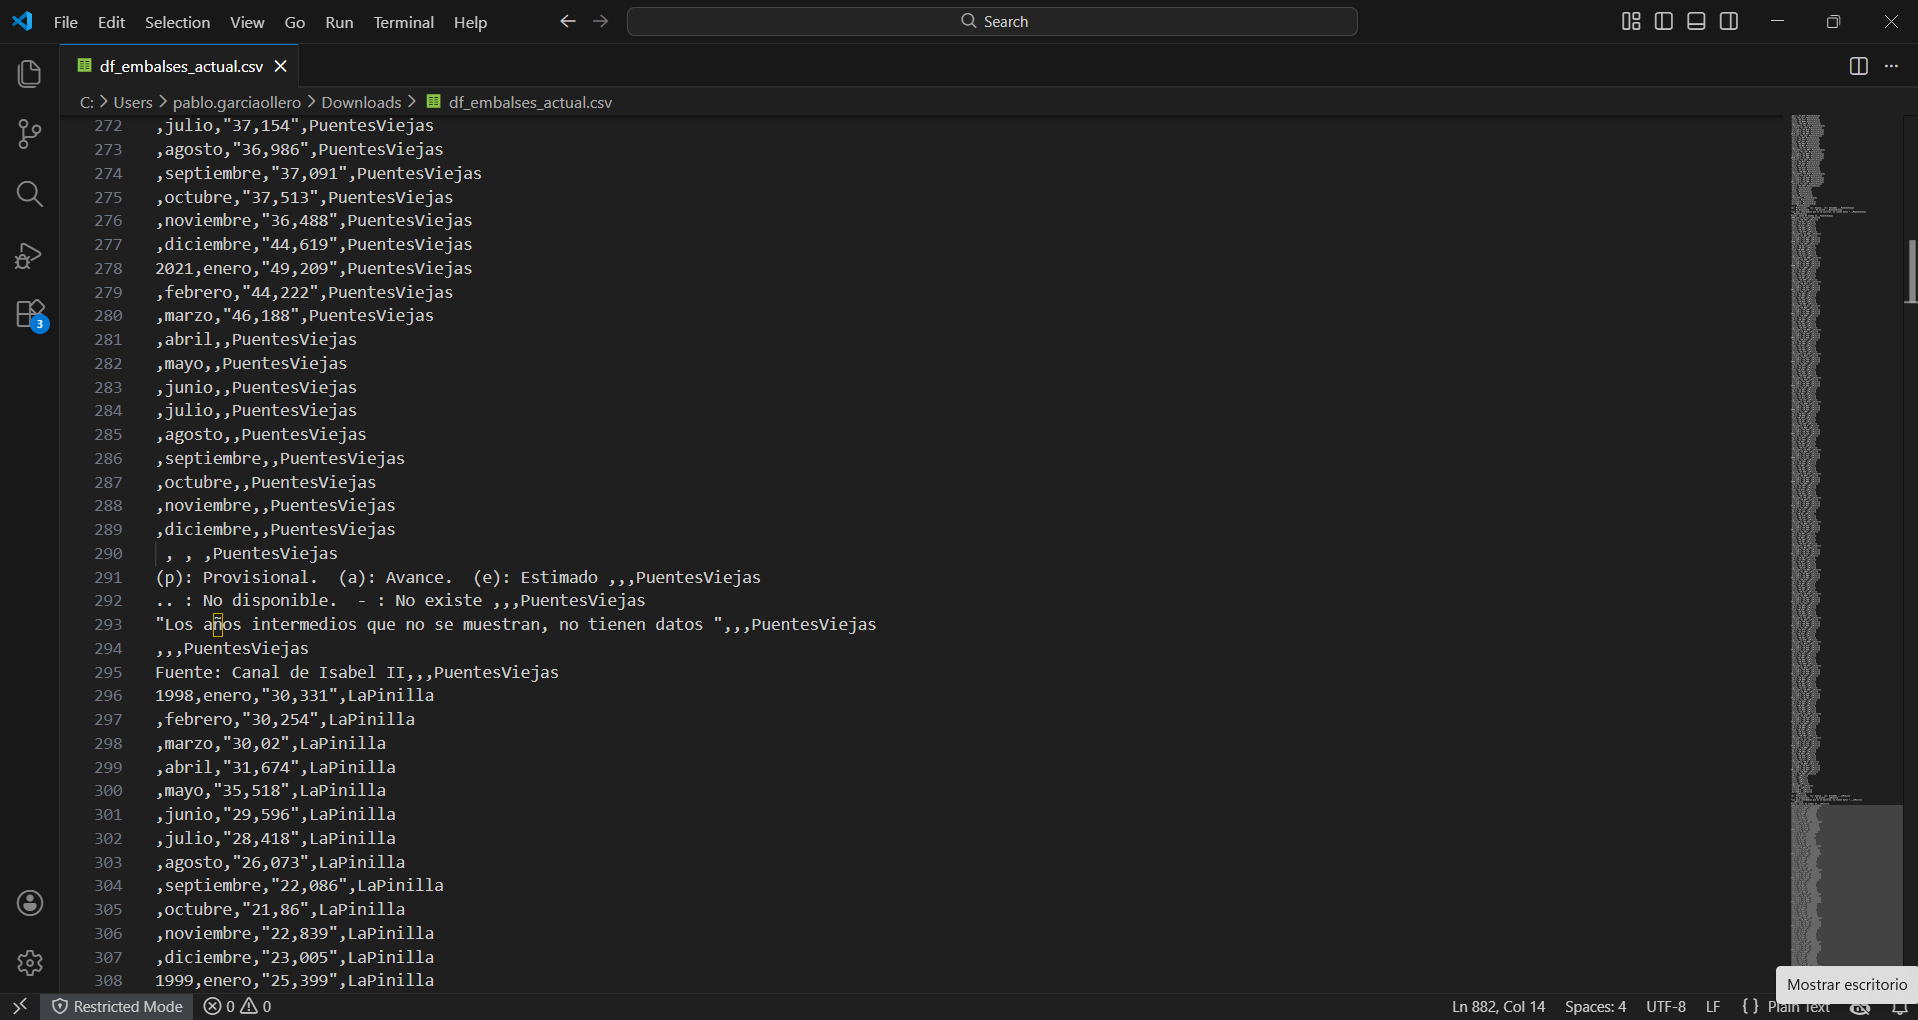

  **El CSV viene de un scraping o extracción de datos desde PDFs o HTML del Canal de Isabel II.**

    El problema es que los documentos del Canal incluyen:
    

*   Mensajes de nota: "Fuente: Canal de Isabel II"

*   Notas al pie: "(p): Provisional", "(a): Avance"

*   Textos de ayuda: "Los años intermedios…"

*   Filas con celdas vacías que el parser tradujo como ,, , (Valores Nan)

*   Valores que el OCR detectó como texto

*   Cabeceras entre años mezcladas con las filas

*   Columnas duplicadas como filas como las de ano, mes, hec_cub y embalse   (Debido probablemente al metodo usado de insertar los csv juntos)

Es decir, el<
> dataset no está limpio y contiene partes del documento original metidas dentro del CSV como si fueran filas, las cuales se traducen como ruido para el dataset.